# IPAN - ImageJ Processing Assistant Notebook

## 03 - Working with IPAN module
**Image analysis with imported processing functions**

Multiple imageJ functions are collected in the module IPAN.py for a better organization and architecture of the code. In this way, the process on the jupyter notebook is clear, clean and straightforward. Python helps to deal with the multiple variables used in the analysis: filename, input, output. 

Importantly, the loading of the multiple packages that have been used in the previous notebooks is all done in the IPAN module. In this way, it is not required to initialize imageJ in the notebook. Note that, the python module does not work alone. It is possible to properly run its functions only from the Jupiter notebooks launched within the proper conda environment. In this context, the JPipe module is essential to start the JVM. Due to this issue, it is not possible to re-initialize imagej in the notebook and then continue using the pre-compiled python module. This is one of the main drawbacks of importing PyimageJ cause it limits the use in the notebook of all the existing built-in PyimageJ functions. 

By building a module it is also possible to delete most of the repetitions that happen in the functions. One of the new functions that will be shown in this notebook is the *MacroRun()* that allows running a general ImageJ macro with a pre-compiled skeleton code that takes care of the Input and Output. This function is coupled with the *AddMacro()* that allows creating a library of macros stored in a dictionary. The *MacroRun()* cause it easily enables to produce of personalized pipelines out of multiple macros. Another interesting function shown in this notebook is the *Profile3D()* that computes a 3D map out of the pixel intesity of the image.


The IPAN.py is available in the main repository and can be easily modified/duplicated/upgraded by the user to tune its analysis.

### Import the packages used from the notebook

In [1]:
import scyjava
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Modify memory pool
#scyjava.config.add_options('-Xmx2g') # <--- Example: set 2G memory.

In [3]:
#The import of the IPAN module generates different Warnings in output but they do not affect its functionality
import IPAN

---------------------------------------------------
Importing packages:

os loaded
tiffle loaded
io loaded
matplotlib loaded
numpy loaded
pathlib loaded


---------------------------------------------------
Importing ImageJ:



log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


16:02:32.093 [SciJava-2fca5d38-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

### Image analysis
**Embedding the functions from the module and create an analysis pipeline**

In [4]:
def Count_nuclei(file):
    #Open the image
    IPAN.Open(INPUT_filename = file, process = True)
    
    #Process the image
    IPAN.Filter(process = True)
    IPAN.SubtractBackground(process = True)
    IPAN.Threshold(process = True)
 
    #Analyse the particles and save results
    data = IPAN.Count(process = True)
    IPAN.CloseAll()
    
    return data

In [5]:
%%capture
results = Count_nuclei("image5.tif");

File saving error (IOException):
   "/Users/nicolascristini/IPAN-Project/IPAN/RESULTS/resulted_images/image5_thresholded.tif (No such fil" 
   /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/resulted_images/image5_thresholded.tif
 	Label	Area	Circ.	AR	Round	Solidity
1	image5.tif	192.660	0.834	1.279	0.782	0.925
2	image5.tif	214.630	0.753	1.526	0.655	0.920
3	image5.tif	326.593	0.870	1.373	0.728	0.948
4	image5.tif	190.970	0.843	1.471	0.680	0.928
5	image5.tif	215.475	0.846	1.498	0.667	0.943
6	image5.tif	400.531	0.692	1.981	0.505	0.896
7	image5.tif	176.183	0.897	1.188	0.842	0.943
8	image5.tif	368.843	0.876	1.148	0.871	0.951
9	image5.tif	212.095	0.863	1.381	0.724	0.946
10	image5.tif	199.420	0.827	1.447	0.691	0.937
11	image5.tif	200.688	0.923	1.147	0.872	0.951
12	image5.tif	182.520	0.705	2.014	0.496	0.914
13	image5.tif	195.618	0.746	2.056	0.486	0.920
14	image5.tif	169.000	0.913	1.127	0.887	0.949
15	image5.tif	173.225	0.890	1.103	0.907	0.926
16	image5.tif	184.210	0.716	1.552	0.644	0.895
17	im

In [6]:
results

'/Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image5_data.csv'

In [7]:
import pandas as pd
Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0).drop("Label", axis = 1)
Data

,Area,Circ.,AR,Round,Solidity
,,,,,
1,192.660,0.834,1.279,0.782,0.925
2,214.630,0.753,1.526,0.655,0.920
3,326.593,0.870,1.373,0.728,0.948
4,190.970,0.843,1.471,0.680,0.928
5,215.475,0.846,1.498,0.667,0.943
...,...,...,...,...,...
88,379.406,0.870,1.406,0.711,0.948
89,198.575,0.842,1.572,0.636,0.933
90,376.448,0.734,1.487,0.672,0.914


### Working with the functions from the module

In [8]:
from scyjava import jimport
WindowManager = jimport('ij.WindowManager')

In [9]:
print("All windows are closed:\t",WindowManager.closeAllWindows())

All windows are closed:	 True


In [10]:
#The processing file requires to be called after the open function or they will return an error.
IPAN.Profile()


        There are no images open.

        To use the Profile() function, firstly call the Open() function


Output directories already exist.




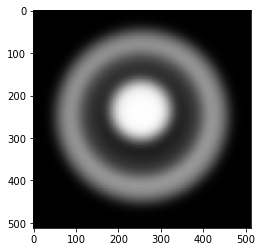


IMAGE ⬆︎

Image path: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Circles.tif
[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES//Circles.tif, /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Results//Circles_profile.png]]
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/
INPUT_filename: Circles.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Results/
OUTPUT_filename: Circles_profile.png


---------------------------------------------------


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES//Circles.tif, /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Results//Circles_profile.png]]


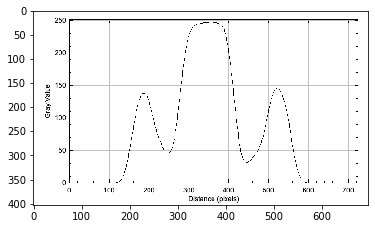

IMAGE PROFILE ⬆︎


In [11]:
#We can alwasys use the Profile function on images of our choice but firsly we must open it with *Open()*
IPAN.Open(path_in = "/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Circles.tif")
IPAN.Profile(path_out = "/Users/nicolascristini/Desktop/Results")

In [12]:
IPAN.CloseAll()


All windows are closed


### In the IPAN module, there are other functions that can be used for a  visualisation of the image under analysis

The Profile3D() function compute a 3D map of the image pixel intensity. It does it without the use of imageJ. It can be useful to understand how the computer sees the image and how the processing steps affect it.

Output directories already exist.


The computer see the image as a matrix of values.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

The human eye see the image as a change in light intensity.

The image can also be as a 3D representation of the pixel intensity:



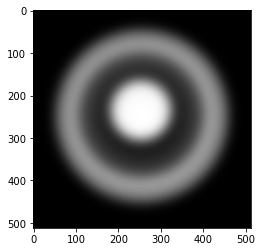

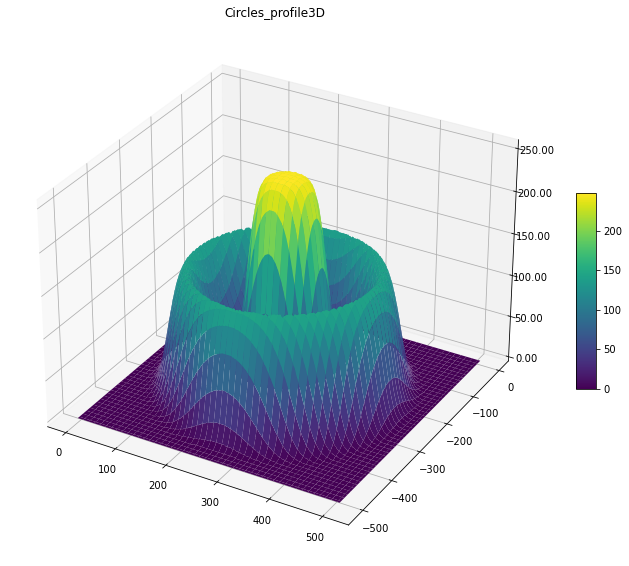

In [13]:
IPAN.Profile3D("/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Circles.tif")

Output directories already exist.


The computer see the image as a matrix of values.
[[0 0 0 ... 2 2 1]
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]

The human eye see the image as a change in light intensity.

The image can also be as a 3D representation of the pixel intensity:



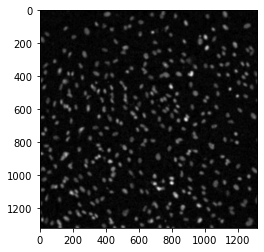

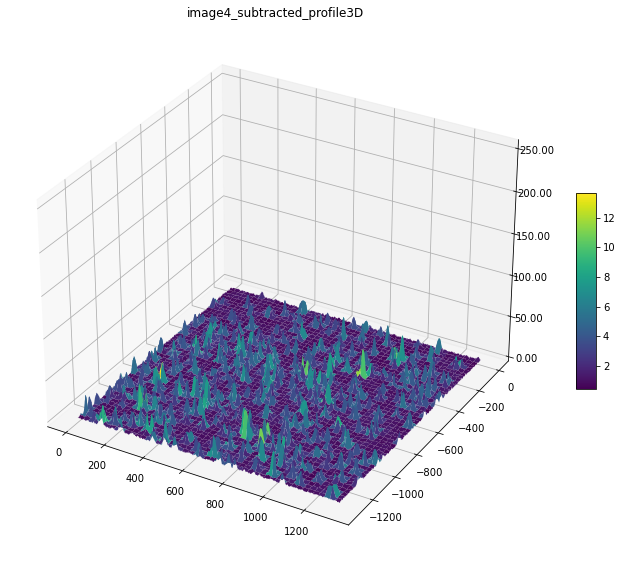

In [14]:
IPAN.Profile3D("/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image4_subtracted.tif")

### Special MacroRUN function


The *IPAN.MacroRun()* function automatically use a set of variables to define the input/output. The following string explains how the variables are obtained from the arguments required in input from the function. <br> Below we can see an example:

In [15]:
example_input_test = """
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
"""

In [16]:
#example filepath
filepath = "/Users/nicolascristini/Desktop/Circles.tif"

In [17]:
#example of the IO arguments from the example filepath

dir_in = "/Users/nicolascristini/Desktop/"
dir_out = "/Users/nicolascristini/Desktop/Results"
filename_in = "Circles.tif"
filename_out = "Circles_results.tif"

Let's now run an example by selecting a simple macro that add some noise to the image.

In [18]:
macro_noise = """
file_path_in = dir_in + filename_in;

open(file_path_in);
run("Add Noise");

file_path_out = dir_out + filename_out;
saveAs("Tiff", file_path_out);
"""

Use the *AddMacro()* function to add the macro test to the macros dictionary

In [19]:
IPAN.AddMacro(title = "noise", text= macro_noise)

I can always call the macro to check it

In [20]:
# Optionally call the test of the macro to see it
IPAN.macros["noise"]

'\nfile_path_in = dir_in + filename_in;\n\nopen(file_path_in);\nrun("Add Noise");\n\nfile_path_out = dir_out + filename_out;\nsaveAs("Tiff", file_path_out);\n'

Use the *IPAN.MacroRun()* function by giving as arguments the path of the original file and the title of the macro I want to run.

In [21]:
IPAN.MacroRun(filepath= "/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Circles.tif", macro_title= "noise")

Output directory already exist.


The results are saved in:

 /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Results/Circles_MacroResult.tiff


Let's now check the result by displaying the image saved as the output file. 

ORIGINAL IMAGE:


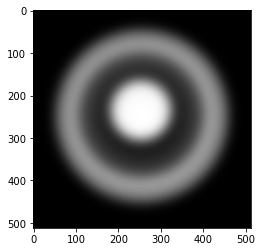

In [22]:
img_original = mpimg.imread("/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Circles.tif")
plt.imshow(img_original, cmap = "gray")
print("ORIGINAL IMAGE:")
plt.show()

NOISY IMAGE:


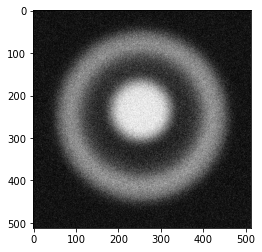

In [23]:
img_noise = mpimg.imread("/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/Results/Circles_result.tiff")
plt.imshow(img_noise, cmap = "gray")
print("NOISY IMAGE:")
plt.show()

With the example above I demonstrated that it is possible to run a macro by directly using the function imported from the module. This is required because, since ImageJ has been initialized by importing the module, it cannot be re-imported and re-initialized in the notebook. This function allows us to run any type of macro we want during the analytical process. <br>
Moreover, the function *AddMacro()* enables the creation of a sort of library that contains all the pre-compiled macros that can be required in the workflow. It is important that the macro_text respects the name of the IO variables as shown in the example. <br> In the following notebook "04-Nuclei Count.ipynb" I will use these same processing functions to run a Nuclei Count on one or multiple samples

***
***